# TFIDF

In [1]:
# I have already imported all the required libraries
# We will be using sckit-learn for Tf-IDF representation and NMF for matrix decomposition
# We will also be using matplot to plot some graphs
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We have a corpus of 4 sentences:
corpus = ["phone camera phone battery", 
          "battery and camera of the phone",
          "cloth texture",
          "style and texture cloth"]

In [3]:
# You can create a object of TFIDF using TfidfVectorizer function that we imported from sckit learn
tfidf = TfidfVectorizer()
# Once we create a object of TFIDF we can use that object to find the Tf-IDF matrix
# This Object will take corpus as input and returns TF-IDF matrix which we will store in X
X = tfidf.fit_transform(corpus)
# We can also use pandas DataFrame to systematically display this Tf-IDF matric 
pd.DataFrame(X.toarray(),columns=tfidf.vocabulary_,index=["doc_"+str(x) for x in range(4)])

,phone,camera,battery,and,of,the,cloth,texture,style
doc_0,0.000000,0.408248,0.408248,0.000000,0.00000,0.816497,0.000000,0.000000,0.00000
doc_1,0.372225,0.372225,0.372225,0.000000,0.47212,0.372225,0.000000,0.000000,0.47212
doc_2,0.000000,0.000000,0.000000,0.707107,0.00000,0.000000,0.000000,0.707107,0.00000
doc_3,0.465809,0.000000,0.000000,0.465809,0.00000,0.000000,0.590819,0.465809,0.00000


# NMF

In [4]:
# Once you have TF-IDF matrix we will create a NMF object
# If we see our corpus you can figure out that there are 2 category sentences are present
# First two sentences corresponds to phone and next two sentences corresponds to cloths
# Hence if you have prior knowledge about corpus you can defind n_components
nmf = NMF(n_components=2, max_iter=2, random_state=0)
# We can use this NMF object and decompose out TF-IDF matrix into document matrix and word matrix
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=2,
    n_components=2, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [5]:
# document matrix
doc_matrix = pd.DataFrame(nmf.transform(X),index=["doc_"+str(idx) for idx in range(4)])
doc_matrix

,0,1
doc_0,0.000000,0.878597
doc_1,0.056260,0.840770
doc_2,0.691503,0.000000
doc_3,0.707012,0.025084


In [6]:
# word matrix
word_matrix = pd.DataFrame(nmf.components_.T,index=tfidf.vocabulary_)
word_matrix

,0,1
phone,0.369680,0.183829
camera,0.000489,0.455349
battery,0.000489,0.455349
and,0.826328,0.000000
of,0.028011,0.256675
the,0.000000,0.707207
cloth,0.431368,0.000000
texture,0.826328,0.000000
style,0.028011,0.256675


In [7]:
doc_matrix.iloc[0]

0    0.000000
1    0.878597
Name: doc_0, dtype: float64

0    0.000000
1    0.878597
Name: doc_0, dtype: float64


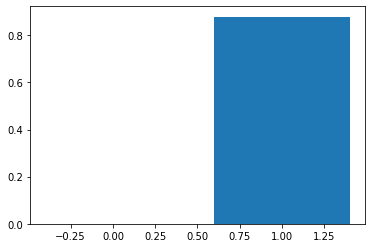

In [8]:
# doc_0 distribution
print(doc_matrix.iloc[0])
plt.bar(range(2),doc_matrix.iloc[0].values)
plt.show()

0    0.369680
1    0.183829
Name: phone, dtype: float64


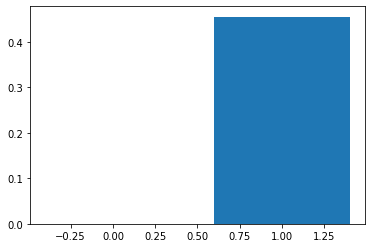

In [9]:
# camera distribution
print(word_matrix.iloc[0])
plt.bar(range(2),word_matrix.iloc[1].values)
plt.show()

# Finding topic for new doc

In [10]:
new_doc = tfidf.transform(['cloth texture'])

In [11]:
pd.DataFrame(new_doc.toarray(),columns=tfidf.vocabulary_,index=["new_doc"])

,phone,camera,battery,and,of,the,cloth,texture,style
new_doc,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0


In [12]:
nmf.transform(new_doc) # related to first cat

array([[0.69150341, 0.        ]])

# Finding optimal K

In [ ]:
# LDA --> n_components = 2  # perplexity
n_components = 3 
n_components = 4 
n_components = 5

.
.
.
100

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

def evaluateElbowCurve(curve,skips,start):
    nPoints = len(curve)
    allCoord = np.vstack((range(nPoints), curve)).T
    np.array([range(nPoints), curve])
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    idxOfBestPoint = np.argmax(distToLine)
    bestK = start
    for i in range(idxOfBestPoint):
        bestK = bestK+skips
    return bestK,curve


def bestKForLDA(doc_Matrix,lower=2,upper=50,skip=1):
    perplexity = {}
    start=1
    for i in range(start,upper,skip):
        lda = LatentDirichletAllocation(n_components = i, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, topic_word_prior=0.1)
        lda.fit(doc_Matrix)
        if lda.perplexity(doc_Matrix)==float('Inf'):
            break
        else:
            perplexity[upper-i]=lda.perplexity(doc_Matrix)
    return evaluateElbowCurve(list(perplexity.values()),skip,start)

In [12]:
bestK,curve = bestKForLDA(X,upper=4)

In [14]:
bestK

2